# Noisets Examples 

In [1]:
import numpy as np
import noisets
from noisets import noisettes as ns

## Load the data

In this notebook, we are interested in the YFV data, published in 2019 by M.Pogorelyy. 

In [2]:
path = '../Data-sets/Data/'
filename1 = 'S1_45_F1_.txt' # first biological replicate
filename2 = 'S1_45_F2_.txt' # second biological replicate
mincount = 0 # always put 0 here (prefered) to extract the whole data-set and then modify it
maxcount = np.inf # always put np.inf here (prefered) to extract the whole data-set and then modify it
colnames1 = ['Clone fraction','Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3'] #colnames that will change if you work with a different data-set
colnames2 = ['Clone fraction','Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3'] # same as above

- Create an object that will be associate to a particular patient, for two dates of interest. In this notebook, we are focused on the null-model learning. So on, "time_1" and "time_2" will be exactlyt the same. For the case of the null-model learning,the two time points refer to two different biological samples.

In [3]:
cl_S1 = ns.Data_Process(path, filename1, filename2, mincount, maxcount, colnames1,  colnames2)
print("First Filename is : " , cl_S1.filename1)
print("Second Filename is : ",  cl_S1.filename2)
print("Name of the columns of first file are : ", cl_S1.colnames1)
print("Name of the columns of second file are : ", cl_S1.colnames2)
print("Minimum count is ", cl_S1.mincount)
print("Maximum count is ", cl_S1.maxcount)

First Filename is :  S1_45_F1_.txt
Second Filename is :  S1_45_F2_.txt
Name of the columns of first file are :  ['Clone fraction', 'Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3']
Name of the columns of second file are :  ['Clone fraction', 'Clone count', 'N. Seq. CDR3', 'AA. Seq. CDR3']
Minimum count is  0
Maximum count is  inf


- Create the data-frame 

In [4]:
n, df = cl_S1.import_data()

In [5]:
df

,Clone_fraction_1,Clone_fraction_2,Clone_count_1,Clone_count_2,ntCDR3,AACDR3
0,0.006647,4.456928e-03,6789.0,4581.0,TGTGCCAGCAGTTCCCCCATAGCGGGACAAAGCTCCTACGAGCAGT...,CASSSPIAGQSSYEQYF
1,0.004999,2.935287e-03,5106.0,3017.0,TGTGCCAGCAGTTACGGACAGGGCAATCAGCCCCAGCATTTT,CASSYGQGNQPQHF
2,0.004559,4.245805e-03,4657.0,4364.0,TGCGCCAGCAGCCAAGATTGGGGGGGCGGCGATACGCAGTATTTT,CASSQDWGGGDTQYF
3,0.003719,2.379752e-03,3799.0,2446.0,TGTGCCAGCAGTTGGGGACAGGGGGTAAACGAGCAGTACTTC,CASSWGQGVNEQYF
4,0.003559,3.208677e-03,3635.0,3298.0,TGCGCCAGCAGCCCCCAGTTCACAGGCTCCTACGAGCAGTACTTC,CASSPQFTGSYEQYF
...,...,...,...,...,...,...
1212121,0.000000,9.729160e-07,0.0,1.0,GGAGCCAGCATTTT,GA_HF
1212122,0.000000,9.729160e-07,0.0,1.0,ATGGCTACACCTTC,MA_TF
1212123,0.000000,9.729160e-07,0.0,1.0,TGCCTCTCACCTT,CL_HL
1212124,0.000000,9.729160e-07,0.0,1.0,TGAGCAGTTCTTC,*A_FF


- Filter the data: $ min_{count} < n(filename_1) < max_{count} $ & $ n(filename_2) \not = 0 $

In [6]:
df_filtered = cl_S1.filter_df(0,50,True) # always put True, I have to improve this
#here, mincount = 0, maxcount = 50
df_filtered

,Clone_fraction_1,Clone_fraction_2,Clone_count_1,Clone_count_2,ntCDR3,AACDR3
745,4.797346e-05,2.724165e-05,49.0,28.0,TGTGCCAGCAGCCAATGGTTGAAAACGGGACCGTCGGATGACACCA...,CASSQWLKTGPSDDTIYF
746,4.797346e-05,5.156455e-05,49.0,53.0,TGCGCCAGCAGCTTGGACACTAGCGGATTATACTACAATGAGCAGT...,CASSLDTSGLYYNEQFF
747,4.797346e-05,5.448329e-05,49.0,56.0,TGTGCCAGCAGCTTAGGGGGGGCGCTAGCCAAAAACATTCAGTACTTC,CASSLGGALAKNIQYF
748,4.797346e-05,4.961871e-05,49.0,51.0,TGTGCCAGCAGCTCAAATGTAGGCGGGGGGGCGGGTGAGCAGTTCTTC,CASSSNVGGGAGEQFF
749,4.797346e-05,3.599789e-05,49.0,37.0,TGCGCCAGCAGCCAAACCCCGGGACAGGGGGCGGACGAGCAGTACTTC,CASSQTPGQGADEQYF
...,...,...,...,...,...,...
621474,9.790503e-07,9.729160e-07,1.0,1.0,TACGAGCAGTACTTC,YEQYF
621475,9.790503e-07,9.729160e-07,1.0,1.0,AATGAGCAGTTCTTC,NEQFF
621477,9.790503e-07,9.729160e-07,1.0,1.0,TGTGCCAGTATTTT,CA_YF
621489,9.790503e-07,9.729160e-07,1.0,1.0,TGGCTACACCTTC,WL_TF


- Visualization of the data

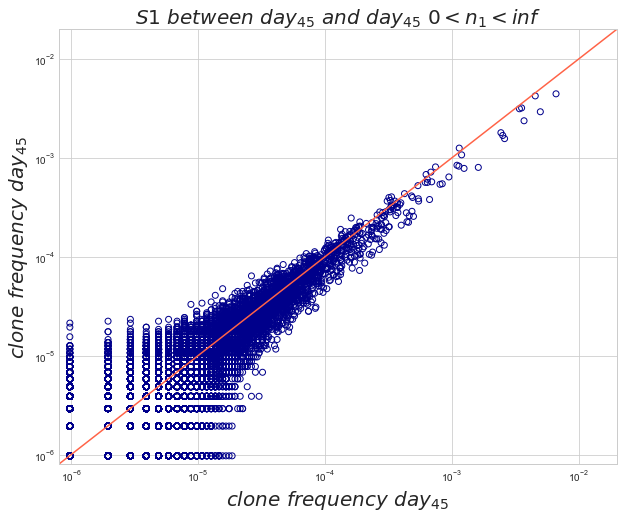

In [6]:
# All the persistent clones between the two samples
cl_S1.scatter_plot(0, np.inf, 'day', '45', '45', 'S1') #see the documentation for the input variables

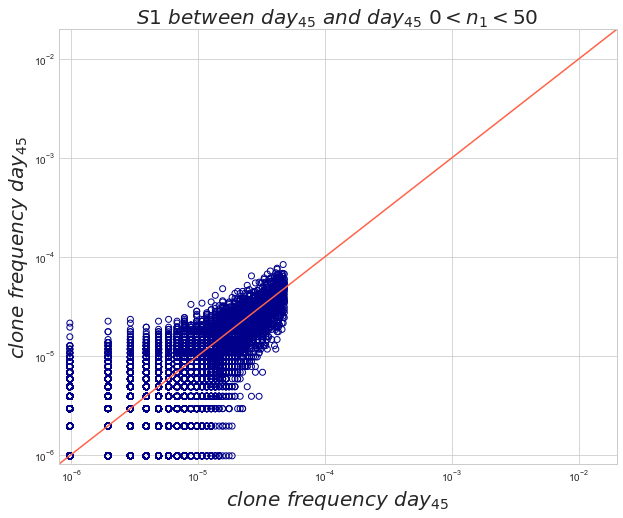

In [7]:
# Plot the scatter plot of the filtered data-set 
# df_filtered
cl_S1.scatter_plot(0, 50, 'day', '45', '45', 'S1') #see the documentation for the input variables

- Cumulative frequencies distribution : 
$\int_{f'}^{1} \rho(f') df'$ 

I dont plot the normalized distribution that would give us the expression above but the counts directly from the data.

/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:351: UserWarning: Attempted to set non-positive bottom ylim on a log-scaled axis.
Invalid limit will be ignored.
/opt/anaconda3/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


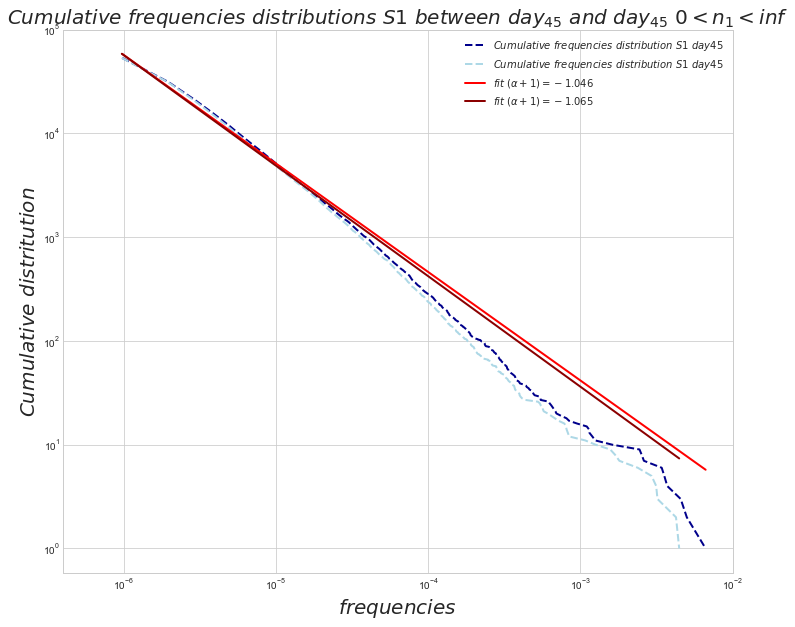

array([10.97419267, 10.97419267, 10.97419267, ...,  2.1416266 ,
        2.04537038,  1.74744846])

In [8]:
cl_S1.cumulative_plots(0, np.inf, 'day', '45', '45', 'S1')

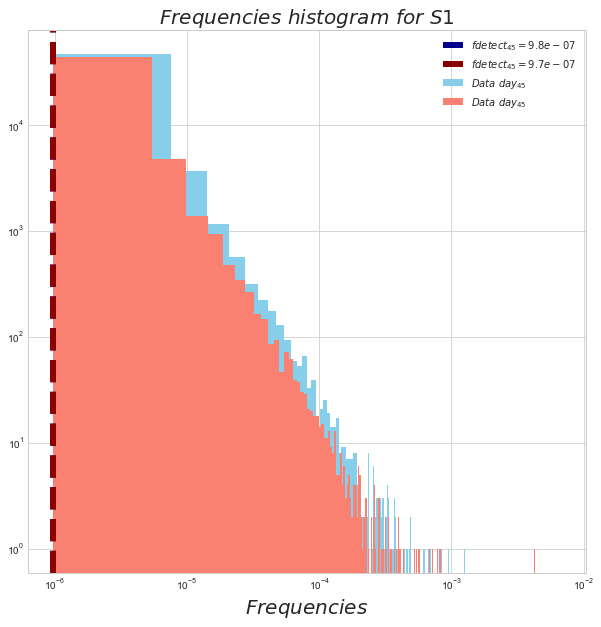

(-13.836682835097033, -13.842968125030387)

In [9]:
cl_S1.frequencies_dist_inters(0, np.inf, 'day', '45', '45', 'S1')

## Null-model learning

In [11]:
sparse_rep = cl_S1.get_sparserep(df) # explain what is exactly sparse_rep, the center object of all the inference 

In [12]:
indn1,indn2,sparse_rep_counts,unicountvals_1,unicountvals_2, NreadsI, NreadsII = sparse_rep 

In [13]:
acq_model_type = 2 # Negative Binomial only
#other models :
# 0 : NB + Poisson
# 1 : Poisson + NB 
# 2 : NB
# 3 : Poisson
init_paras_arr_S1 = [ np.asarray([ -2.07678873,   2.29472138,   1.09323841,   6.65204556,-10.27061188]), \
                    np.asarray([ -2.07585556,   2.33165493,  -0.34198692,   6.53797226,-10.58516877]), \
                    np.asarray([-2.15206189,  0.67881258,  1.04086898, -9.46699067]) \
                 ]
init_paras = init_paras_arr_S1[2]

In [14]:
null_model = ns.RNASeq_NoiseModel() #YFV are RNAseq data

In [15]:
null_model.learn_null_model(sparse_rep, acq_model_type, init_paras, constr_type=1)

Iter      alph_rho  beta      alpha     fmin      


/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:402: RuntimeWarning: divide by zero encountered in true_divide
/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:402: RuntimeWarning: invalid value encountered in log
/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:512: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:610: RuntimeWarning: divide by zero encountered in log


1 22251.234091 86.951692 4363.258613 -480.094689 


/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:432: RuntimeWarning: divide by zero encountered in log10
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/function_base.py:159: RuntimeWarning: invalid value encountered in multiply
  y *= step
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/function_base.py:168: RuntimeWarning: invalid value encountered in add
  y += start
/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:503: RuntimeWarning: overflow encountered in power
/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:403: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:403: RuntimeWarning: invalid value encountered in multiply
/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:400: RuntimeWarning: divide by zero encountered in true_di

2 414.999453 2617.350359 817.047588 -2660.225595 


/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:503: RuntimeWarning: overflow encountered in multiply
/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:400: RuntimeWarning: invalid value encountered in true_divide


3 97.120783 -571.399609 -160.598104 -1333.188202 


/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:402: RuntimeWarning: divide by zero encountered in log
/opt/anaconda3/lib/python3.7/site-packages/noisets-0.0.1-py3.7.egg/noisets/noisettes.py:403: RuntimeWarning: invalid value encountered in log


4 -2.116377 0.501167 1.042961 -9.835262 
5 -2.105344 0.581103 1.079406 -9.823516 
6 -2.096235 0.610718 1.086033 -9.968727 
7 -2.058380 0.554114 1.055153 -10.629832 
8 12.255191 -28.655716 -11.139147 -256.183300 
9 12.236726 -29.673622 -11.294807 -255.729131 
10 -2.076827 0.575790 1.069953 -10.297309 
11 -2.074119 0.576916 1.070939 -10.307821 
12 -2.076611 0.575360 1.069807 -10.299958 
13 -2.077235 0.575876 1.069773 -10.299144 
14 -2.077431 0.576474 1.069840 -10.300753 
15 -2.077196 0.575402 1.069582 -10.300895 
16 -2.076979 0.576449 1.069977 -10.301264 
17 -2.076741 0.577168 1.070298 -10.300944 
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 1886507.597222088
            Iterations: 17
            Function evaluations: 138
            Gradient evaluations: 17
     fun: 1886507.597222088
     jac: array([  840.125,  1009.5  , -3275.5  ,   -36.375])
 message: 'Optimization terminated successfully.'
    nfev: 138
     nit: 17
    njev: 17
  stat

(     fun: 1886507.597222088
      jac: array([  840.125,  1009.5  , -3275.5  ,   -36.375])
  message: 'Optimization terminated successfully.'
     nfev: 138
      nit: 17
     njev: 17
   status: 0
  success: True
        x: array([ -2.0769787 ,   0.57644863,   1.0699767 , -10.30126439]),
 4.348776893201884e-10)